# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Adding the city parameter 
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | botro
Processing Record 2 of Set 1 | itoman
Processing Record 3 of Set 1 | araguaina
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | yelizovo
Processing Record 6 of Set 1 | nacala
Processing Record 7 of Set 1 | fort bragg
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | puerto baquerizo moreno
Processing Record 11 of Set 1 | kill devil hills
Processing Record 12 of Set 1 | quelimane
Processing Record 13 of Set 1 | suva
Processing Record 14 of Set 1 | mossel bay
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | nouadhibou
Processing Record 18 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | belmonte
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,botro,7.8525,-5.3106,36.10,7,0,1.81,CI,1738085394
1,itoman,26.1247,127.6694,13.21,54,100,8.23,JP,1738085461
2,araguaina,-7.1911,-48.2072,32.02,51,43,1.94,BR,1738085463
3,yelizovo,53.1873,158.3805,-1.92,50,75,7.00,RU,1738085465
4,nacala,-14.5428,40.6728,25.72,89,100,0.31,MZ,1738085466


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,botro,7.8525,-5.3106,36.10,7,0,1.81,CI,1738085394
1,itoman,26.1247,127.6694,13.21,54,100,8.23,JP,1738085461
2,araguaina,-7.1911,-48.2072,32.02,51,43,1.94,BR,1738085463
3,yelizovo,53.1873,158.3805,-1.92,50,75,7.00,RU,1738085465
4,nacala,-14.5428,40.6728,25.72,89,100,0.31,MZ,1738085466


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

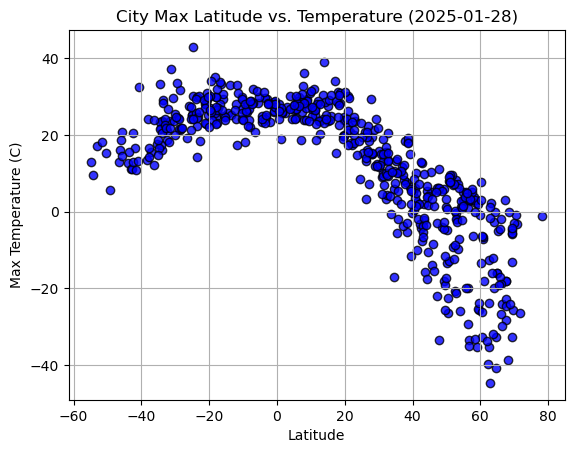

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="blue", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
current_date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

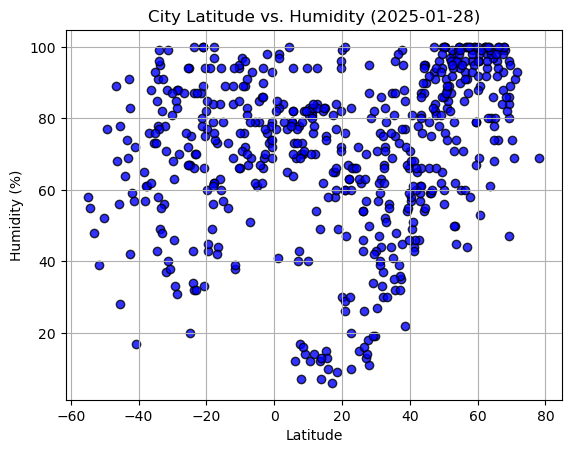

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="blue", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
current_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

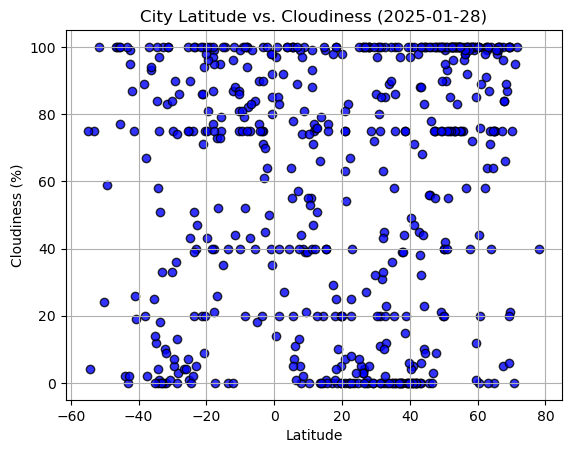

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="blue", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
current_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

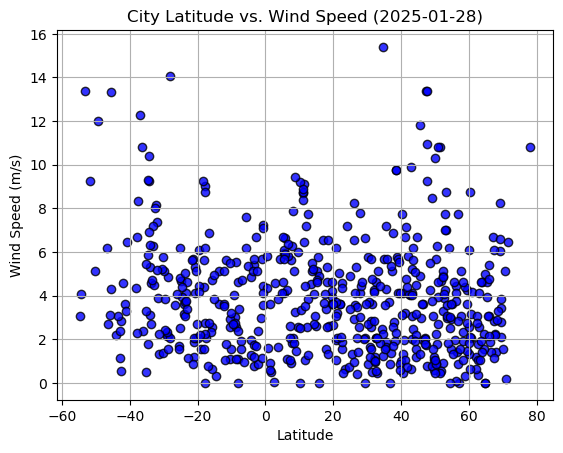

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="blue", edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
current_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_hemisphere_regression(df, x_column, y_column, hemisphere, title, xlabel, ylabel):
    
    # Extract x and y values
    x_values = df[x_column]
    y_values = df[y_column]
    
    # Performs linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Print R² value
    print(f"The R² value is: {r_value**2}")
    
    # Creates the regression line
    regression_line = slope * x_values + intercept
    
    # Plots the scatter plot
    plt.scatter(x_values, y_values, color="blue", edgecolor="k", alpha=0.8)
    
    # Plots the regression line
    plt.plot(x_values, regression_line, color="red")
    
    # Annotate the regression equation and R² value
    plt.annotate(
        f"y = {slope:.2f}x + {intercept:.2f}", 
        (min(x_values) + 5, min(y_values) + 5),  # Adjusts annotation position
        fontsize=12, color="red"
    )
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Show the plot
    plt.show()



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,botro,7.8525,-5.3106,36.10,7,0,1.81,CI,1738085394
1,itoman,26.1247,127.6694,13.21,54,100,8.23,JP,1738085461
3,yelizovo,53.1873,158.3805,-1.92,50,75,7.00,RU,1738085465
5,fort bragg,35.1390,-79.0060,13.23,41,0,5.66,US,1738085467
6,hamilton,39.1834,-84.5333,6.53,54,0,4.12,US,1738085469


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,araguaina,-7.1911,-48.2072,32.02,51,43,1.94,BR,1738085463
4,nacala,-14.5428,40.6728,25.72,89,100,0.31,MZ,1738085466
7,grytviken,-54.2811,-36.5092,9.54,55,4,4.07,GS,1738085470
8,puerto baquerizo moreno,-0.9000,-89.6000,28.55,74,40,5.66,EC,1738085471
10,quelimane,-17.8786,36.8883,24.52,97,99,2.73,MZ,1738085473


###  Temperature vs. Latitude Linear Regression Plot

The R² value is: 0.706286476853143


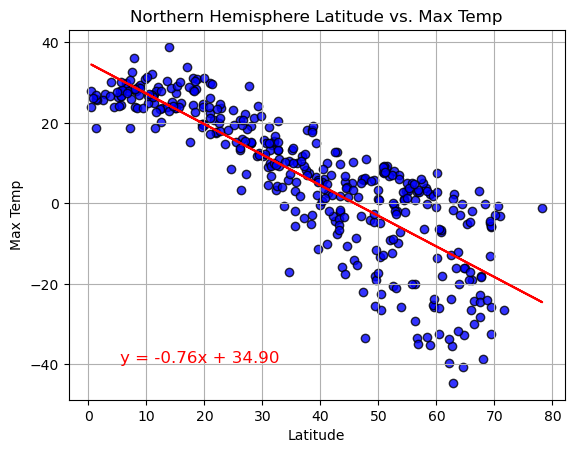

In [15]:
# Linear regression on Northern Hemisphere
plot_hemisphere_regression(
    northern_hemi_df, 
    "Lat", 
    "Max Temp", 
    "Northern", 
    "Northern Hemisphere Latitude vs. Max Temp", 
    "Latitude", 
    "Max Temp"
)

The R² value is: 0.35387184960635454


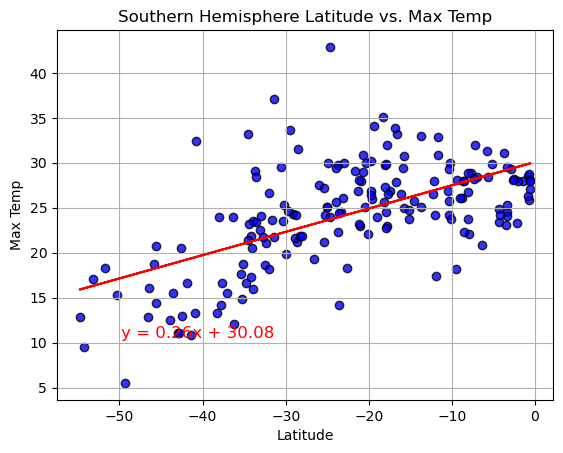

In [16]:
# Linear regression on Southern Hemisphere
plot_hemisphere_regression(
    southern_hemi_df, 
    "Lat", 
    "Max Temp", 
    "Northern", 
    "Southern Hemisphere Latitude vs. Max Temp", 
    "Latitude", 
    "Max Temp"
)

**Discussion about the linear relationship:** The Northern Hemisphere temperatures decrease as latitude increases due to moving away from the equator.  The Southern Hemisphere temperatures increase as latitude approaches the equator.  Also a larger R^2 in Northern Hemisphere comapred to the Southern, could be because the Northern Hemisphere has more landmass and could lead to greater temperature variation than a more ocean covered Southern Hemisphere.  

### Humidity vs. Latitude Linear Regression Plot

The R² value is: 0.17195626894842683


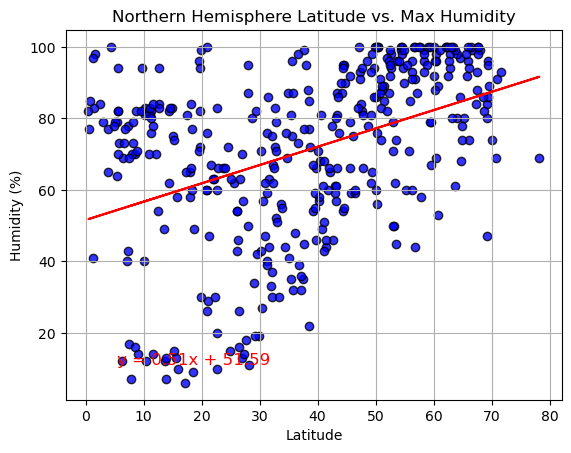

In [17]:
# Northern Hemisphere
plot_hemisphere_regression(
    northern_hemi_df, 
    "Lat", 
    "Humidity", 
    "Northern", 
    "Northern Hemisphere Latitude vs. Max Humidity", 
    "Latitude", 
    "Humidity (%)"
)

The R² value is: 0.05861643707630137


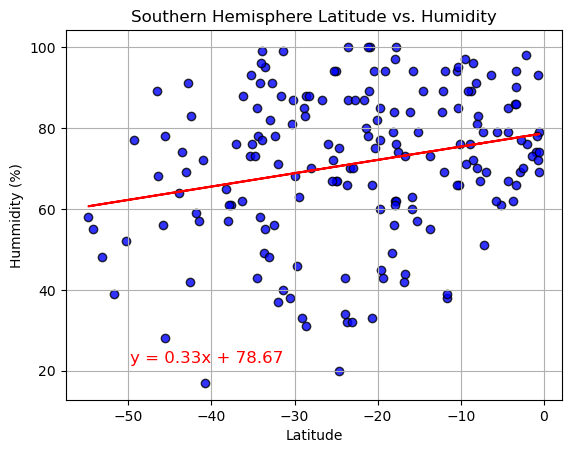

In [18]:
# Southern Hemisphere
plot_hemisphere_regression(
    southern_hemi_df, 
    "Lat", 
    "Humidity", 
    "Northern", 
    "Southern Hemisphere Latitude vs. Humidity", 
    "Latitude", 
    "Hummidity (%)"
)

**Discussion about the linear relationship:** Both hemispheres have low R^2 values that could indicate significant variability in humidity levels that are not shown by just a comparison to latitude.  There is a slight trend in both hemispheres that higher latitude is linked to slightly higher humidity.  

### Cloudiness vs. Latitude Linear Regression Plot

The R² value is: 0.08444848937760523


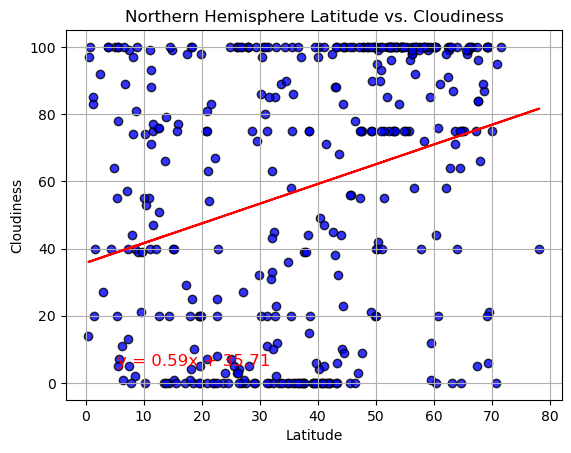

In [19]:
# Northern Hemisphere
plot_hemisphere_regression(
    northern_hemi_df, 
    "Lat", 
    "Cloudiness", 
    "Northern", 
    "Northern Hemisphere Latitude vs. Cloudiness", 
    "Latitude", 
    "Cloudiness"
)

The R² value is: 0.044622976407990456


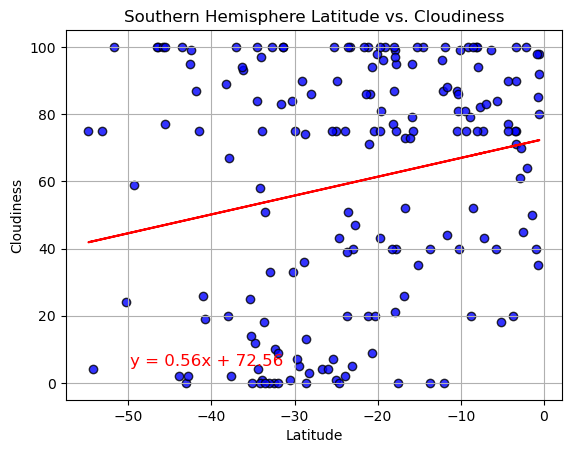

In [20]:
# Southern Hemisphere
plot_hemisphere_regression(
    southern_hemi_df, 
    "Lat", 
    "Cloudiness", 
    "Northern", 
    "Southern Hemisphere Latitude vs. Cloudiness", 
    "Latitude", 
    "Cloudiness"
)

**Discussion about the linear relationship:** Both hemispheres show weak correlations between latitude and cloudiness.  R^2 values are low for both hemispheres.  Both show slight positive slopes which shoes cloudiness increases slightly as latitude appriaches the equator.  Cloudiness apears to be highly variable.  

### Wind Speed vs. Latitude Linear Regression Plot

The R² value is: 0.00650085003207307


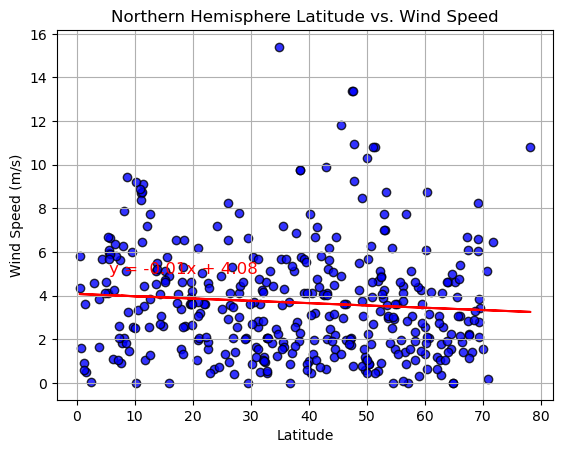

In [21]:
# Northern Hemisphere
plot_hemisphere_regression(
    northern_hemi_df, 
    "Lat", 
    "Wind Speed", 
    "Northern", 
    "Northern Hemisphere Latitude vs. Wind Speed", 
    "Latitude", 
    "Wind Speed (m/s)"
)

The R² value is: 0.07813379702146458


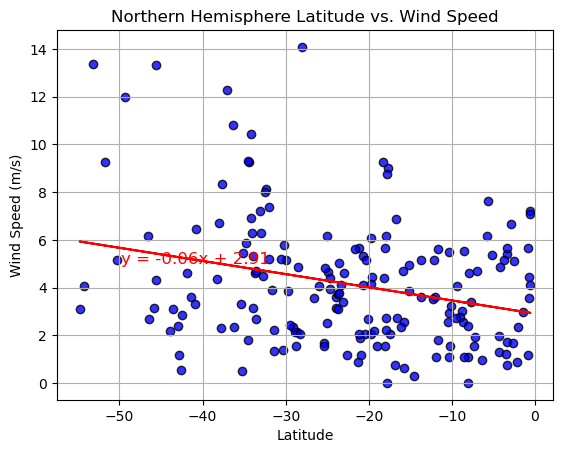

In [22]:
# Southern Hemisphere
plot_hemisphere_regression(
    southern_hemi_df, 
    "Lat", 
    "Wind Speed", 
    "Northern", 
    "Northern Hemisphere Latitude vs. Wind Speed", 
    "Latitude", 
    "Wind Speed (m/s)"
)

**Discussion about the linear relationship:** With the data provided the northern hemisphere currently shows no trend between latitude and wind speed.  The southern hemisphere this is a slight tendancy for wind speed to decrease closer to the equator but not significant.  Wind speed is variable in both hemispheres, and likley more influenced by factors other than temperatures.  